<a href="https://colab.research.google.com/github/soumilbaldota/MNIST/blob/master/Asirra_dataset(filtered).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
url="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zpdr=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=url,extract=True)


In [25]:
zip_dir_base = os.path.dirname(zpdr)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [26]:
base_dir=os.path.join(os.path.dirname(zpdr),'cats_and_dogs_filtered')

train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [27]:
num_cats_tr=len(os.listdir(train_cats_dir))
num_dogs_tr=len(os.listdir(train_dogs_dir))

num_cats_val=len(os.listdir(validation_cats_dir))
num_dogs_val=len(os.listdir(validation_dogs_dir))

total_train=num_cats_tr+num_dogs_tr
total_val=num_cats_val+num_dogs_val


In [28]:
print('total training cat images',num_cats_tr)
print('total training dog images',num_dogs_tr)

print('total validation cat images ',num_cats_val)
print('total validation dog images',num_dogs_val)

print('total training images',total_train)
print('total validation images',total_val)

total training cat images 1000
total training dog images 1000
total validation cat images  500
total validation dog images 500
total training images 2000
total validation images 1000


In [29]:
batchsize=100
imgshape=150
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)


In [30]:
train_data_gen=train_image_generator.flow_from_directory(batch_size=batchsize,
                                                         directory=train_dir,
                                                         shuffle=True,
                                                         target_size=(imgshape,imgshape),
                                                         class_mode='binary')


Found 2000 images belonging to 2 classes.


In [31]:
validation_data_gen=validation_image_generator.flow_from_directory(batch_size=batchsize,
                                                                   directory=validation_dir,
                                                                   shuffle=True,
                                                                   target_size=(imgshape,imgshape),
                                                                   class_mode='binary')


Found 1000 images belonging to 2 classes.


In [32]:
sample_training_images,_=next(train_data_gen)

In [33]:
def plotImages(images_arr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

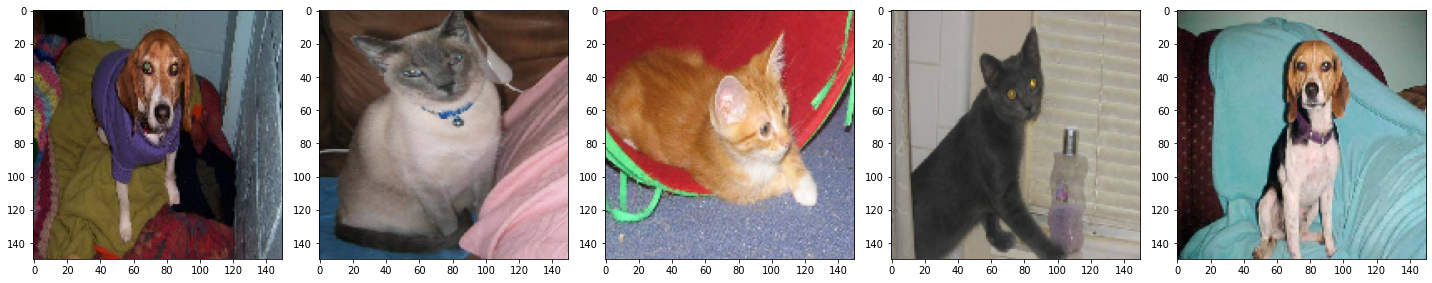

In [34]:
plotImages(sample_training_images[:5])

In [35]:
l00=tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))
l01=tf.keras.layers.MaxPooling2D(2,2)

l10=tf.keras.layers.Conv2D(64,(3,3),activation='relu')
l11=tf.keras.layers.MaxPooling2D(2,2)

l20=tf.keras.layers.Conv2D(128,(3,3),activation='relu')
l21=tf.keras.layers.MaxPooling2D(2,2)

l30=tf.keras.layers.Conv2D(128,(3,3),activation='relu')
l31=tf.keras.layers.MaxPooling2D(2,2)

lflat=tf.keras.layers.Flatten()
ldense=tf.keras.layers.Dense(512,activation='relu')
lout=tf.keras.layers.Dense(2,activation='softmax')

layers=[l00,l01,l10,l11,l20,l21,l30,l31,lflat,ldense,lout]

model=tf.keras.Sequential(layers)

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [38]:
history=model.fit(
            train_data_gen,
            steps_per_epoch=int(total_train//batchsize),
            epochs=10,
            validation_data=validation_data_gen,
            validation_steps=int(total_val//float(batchsize))
        )


Epoch 1/10
20/20 [==============================] - 9s 455ms/step - loss: 0.6934 - accuracy: 0.5150 - val_loss: 0.6821 - val_accuracy: 0.6080
Epoch 2/10
20/20 [==============================] - 9s 433ms/step - loss: 0.6730 - accuracy: 0.5740 - val_loss: 0.6560 - val_accuracy: 0.6170
Epoch 3/10
20/20 [==============================] - 9s 435ms/step - loss: 0.6366 - accuracy: 0.6445 - val_loss: 0.6253 - val_accuracy: 0.6560
Epoch 4/10
20/20 [==============================] - 9s 438ms/step - loss: 0.6147 - accuracy: 0.6700 - val_loss: 0.6101 - val_accuracy: 0.6740
Epoch 5/10
20/20 [==============================] - 9s 433ms/step - loss: 0.5763 - accuracy: 0.7185 - val_loss: 0.5928 - val_accuracy: 0.7040
Epoch 6/10
20/20 [==============================] - 9s 434ms/step - loss: 0.5684 - accuracy: 0.7255 - val_loss: 0.5942 - val_accuracy: 0.7070
Epoch 7/10
20/20 [==============================] - 9s 427ms/step - loss: 0.5502 - accuracy: 0.7480 - val_loss: 0.5758 - val_accuracy: 0.7240
Epoch 

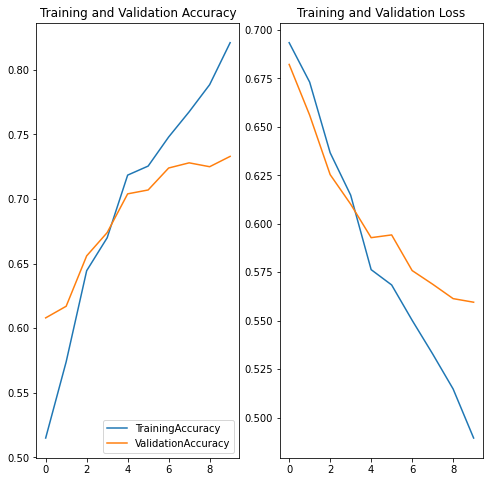

In [39]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(10)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='TrainingAccuracy')
plt.plot(epochs_range,val_acc,label='ValidationAccuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='TrainingLoss')
plt.plot(epochs_range,val_loss,label='ValidationLoss')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()